# Data Cleaning

In [15]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from ast import literal_eval

In [16]:
file_path = r"C:\Users\rupal\Desktop\Lectures Material\MGMT 586\FinalProject\archive\Raw.csv"
count = 0
raw_file = pd.read_csv(file_path)

### Web Scrapping

In [17]:
for i in raw_file['imdb_id']:
    url = "https://www.imdb.com/title/"+i+"/"
    print(url)
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    certificate = soup.find_all('a', class_='ipc-link')
    for cert in certificate:
        if cert.has_attr('href'):
            if '/certificates?' in cert['href']:
                raw_file.loc[count, 'Certificate'] = cert.get_text()

    Country = soup.find_all('a', class_='ipc-metadata-list-item__list-content-item')
    for coun in Country:
        if coun.has_attr('href'):
            if 'country_of_origin' in coun['href']:
                raw_file.loc[count, 'Country'] = coun.get_text()
    try:
        Rating = soup.find_all('span', class_='AggregateRatingButton__RatingScore-sc-1ll29m0-1 iTLWoV')
        raw_file.loc[count, 'Rating'] = Rating[0].get_text()
    except:
        raw_file.loc[count, 'Rating'] = 0

    try:
        budget = soup.select('li[data-testid="title-boxoffice-budget"]')[0].select('span[class="ipc-metadata-list-item__list-content-item"]')[0].get_text()
        budget = budget.replace(" (estimated)", "")
        budget = budget.replace("$", "")
        budget = budget.replace(",", "")
        raw_file.loc[count, 'budget'] = int(budget)
    except:
        raw_file.loc[count, 'budget'] = 0
    try:
        revenue = soup.select('li[data-testid="title-boxoffice-cumulativeworldwidegross"]')[0].select('span[class="ipc-metadata-list-item__list-content-item"]')[0].get_text()
        revenue = revenue.replace("$", "")
        revenue = revenue.replace(",", "")
        raw_file.loc[count, 'revenue'] = revenue
    except:
        raw_file.loc[count, 'revenue'] = 0

    count += 1

https://www.imdb.com/title/tt0913354/
https://www.imdb.com/title/tt0091276/
https://www.imdb.com/title/tt0099312/
https://www.imdb.com/title/tt0020163/
https://www.imdb.com/title/tt0048610/
https://www.imdb.com/title/tt0114432/
https://www.imdb.com/title/tt0119872/
https://www.imdb.com/title/tt0054880/
https://www.imdb.com/title/tt0019574/
https://www.imdb.com/title/tt1407050/
https://www.imdb.com/title/tt0049875/
https://www.imdb.com/title/tt0066448/
https://www.imdb.com/title/tt0016481/
https://www.imdb.com/title/tt0806203/
https://www.imdb.com/title/tt0074686/
https://www.imdb.com/title/tt0061736/
https://www.imdb.com/title/tt0976246/
https://www.imdb.com/title/tt0949815/
https://www.imdb.com/title/tt0250730/
https://www.imdb.com/title/tt0806027/


In [19]:
raw_file.to_csv(r"C:\Users\rupal\Desktop\Lectures Material\MGMT 586\FinalProject\archive\DataCleared1.1.csv", index=False)

### To get genres and language

In [20]:
def code_to_expansion(shortform):
    switcher = {
        "bn": "Bengali",
        "cs": "Czech",
        "da": "Danish",
        "de": "German",
        "en": "English",
        "es": "Spanish",
        "fr": "French",
        "it": "Italian",
        "ja": "Japanese",
        "nl": "Dutch",
        "pl": "Polish",
        "pt": "Portuguese",
        "ro": "Romanian",
        "ru": "Russian",
        "sr": "Serbian",
        "sv": "Swedish",
        "zh": "Chinese"
    }
    return switcher.get(shortform, "NotApplicable")

In [22]:
file_path = r"C:\Users\rupal\Desktop\Lectures Material\MGMT 586\FinalProject\archive\DataCleared1.1.csv"
raw_file = pd.read_csv(file_path)
count = 0

raw_file["genres"] = raw_file["genres"].apply(literal_eval)

In [23]:
for i in raw_file['genres']:
    genre = ''
    for j in i:
        genre = genre + ',' + j['name']
    raw_file.loc[count, 'genres'] = genre[1:]

    try:
        temp = raw_file.loc[count, 'original_language']
        raw_file.loc[count, 'original_language'] = code_to_expansion(temp)
    except:
        raw_file.loc[count, 'original_language'] = "NotApplicable"

    count += 1

In [24]:
raw_file.to_csv(file_path, index=False)

# EDA

In [2]:
import os 
import pandas as pd
data = pd.read_csv(r"C:\Users\rupal\Desktop\Lectures Material\MGMT 586\FinalProject\archive\DataCleared1.1.csv")
data.head()

,IMDB_id,Title,Budget,Genres,Revenue,Runtime,Language,Status,Vote Average,Country,Certificate,Rating,Release Year,Vote Count
0,tt0114709,Toy Story,30000000,"Animation,Comedy,Family",394436586,81,English,Released,7.7,United States,G,8.3,1995,5415
1,tt0113497,Jumanji,65000000,"Adventure,Fantasy,Family",262821940,104,English,Released,6.9,United States,PG,7.0,1995,2413
2,tt0113277,Heat,60000000,"Action,Crime,Drama,Thriller",187436818,170,English,Released,7.7,United States,R,8.2,1995,1886
3,tt0113189,GoldenEye,60000000,"Adventure,Action,Thriller",352194034,130,English,Released,6.6,United States,PG-13,7.2,1995,1194
4,tt0112641,Casino,52000000,"Drama,Crime",116112375,178,English,Released,7.8,France,R,8.2,1995,1343


In [3]:
data['Revenue']=data['Revenue']/1000000000
data['Budget']=data['Budget']/1000000000
data['Year_from_2021'] = 2021-data["Release Year"]
data = data.rename(columns={'Year_from_2021': 'Recency'})
data.head()

,IMDB_id,Title,Budget,Genres,Revenue,Runtime,Language,Status,Vote Average,Country,Certificate,Rating,Release Year,Vote Count,Recency
0,tt0114709,Toy Story,0.030,"Animation,Comedy,Family",0.394437,81,English,Released,7.7,United States,G,8.3,1995,5415,26
1,tt0113497,Jumanji,0.065,"Adventure,Fantasy,Family",0.262822,104,English,Released,6.9,United States,PG,7.0,1995,2413,26
2,tt0113277,Heat,0.060,"Action,Crime,Drama,Thriller",0.187437,170,English,Released,7.7,United States,R,8.2,1995,1886,26
3,tt0113189,GoldenEye,0.060,"Adventure,Action,Thriller",0.352194,130,English,Released,6.6,United States,PG-13,7.2,1995,1194,26
4,tt0112641,Casino,0.052,"Drama,Crime",0.116112,178,English,Released,7.8,France,R,8.2,1995,1343,26


In [4]:
pd.set_option('display.max_rows', None)
data.Recency.value_counts() 

14     49
16     41
17     38
15     35
22     31
19     31
20     30
18     26
26     24
21     23
23     23
24     21
13     19
31     19
29     17
32     17
27     16
30     16
25     15
33     15
34     14
28     14
35     14
36     13
37     11
39     11
38      9
49      8
53      8
44      8
41      7
42      7
64      7
47      6
46      6
50      6
43      6
48      6
60      5
57      5
61      5
12      5
70      5
59      5
10      5
58      5
45      5
9       5
75      5
62      5
56      5
71      4
81      4
73      4
82      4
40      4
55      4
52      4
11      4
63      3
88      3
65      3
84      3
77      3
8       3
80      3
86      2
90      2
94      2
6       2
76      2
67      2
66      2
54      2
51      2
79      1
69      1
68      1
83      1
85      1
89      1
91      1
7       1
96      1
101     1
Name: Recency, dtype: int64

In [5]:
from pandasql import sqldf
import matplotlib.pyplot as plt
pysqldf = lambda q: sqldf(q, globals())

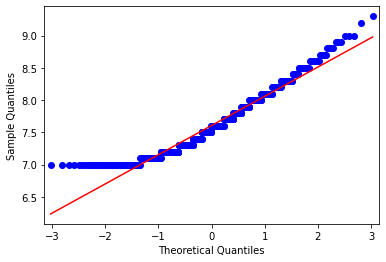

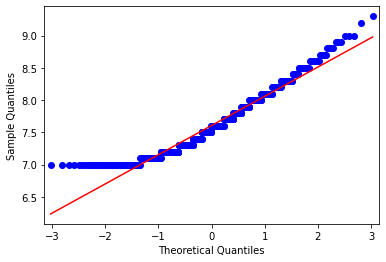

In [6]:
from statsmodels.graphics.gofplots import qqplot
qqplot(data.Rating, line='s')

In [7]:
certi = pysqldf("""select Certificate,count(*) cnt,avg(Rating) avg_rating from data group by 1 order by 2 desc limit 6;""")
certi

,Certificate,cnt,avg_rating
0,R,396,7.587879
1,PG-13,147,7.547619
2,PG,110,7.611818
3,Not Rated,49,7.597959
4,G,29,7.862069
5,Approved,24,7.900000


In [8]:
recency_rating = pysqldf("""select Recency,count(*) cnt_movies,avg(Rating) avg_rating from data group by 1 order by 1;""")
recency_rating

,Recency,cnt_movies,avg_rating
0,6,2,7.300000
1,7,1,7.100000
2,8,3,7.366667
3,9,5,7.460000
4,10,5,7.820000
5,11,4,7.350000
6,12,5,7.420000
7,13,19,7.442105
8,14,49,7.438776
9,15,35,7.508571


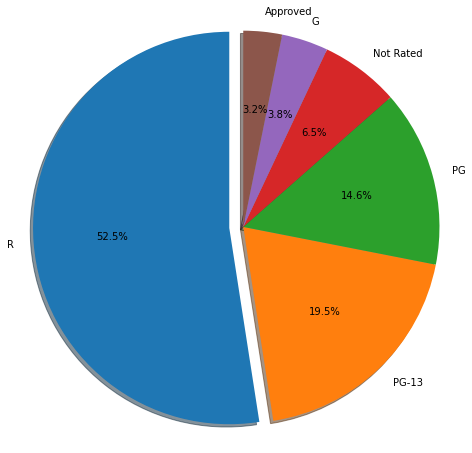

In [9]:
labels = certi['Certificate'] 
sizes =  certi['cnt']
explode = (0.1, 0, 0, 0,0,0)  
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, explode=explode,labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, radius=1.4)
ax1.axis('equal')  
plt.show()

In [10]:
Ctry = pysqldf("""select Country,count(*) cnt,avg(Rating) avg_rating from data group by 1 order by 2 desc limit 6;""")
Ctry

,Country,cnt,avg_rating
0,United States,514,7.632101
1,United Kingdom,69,7.527536
2,Germany,38,7.468421
3,France,32,7.475000
4,Japan,24,7.654167
5,Canada,19,7.452632


Text(0.5, 1.0, 'Average Rating and Movies by Coutries')

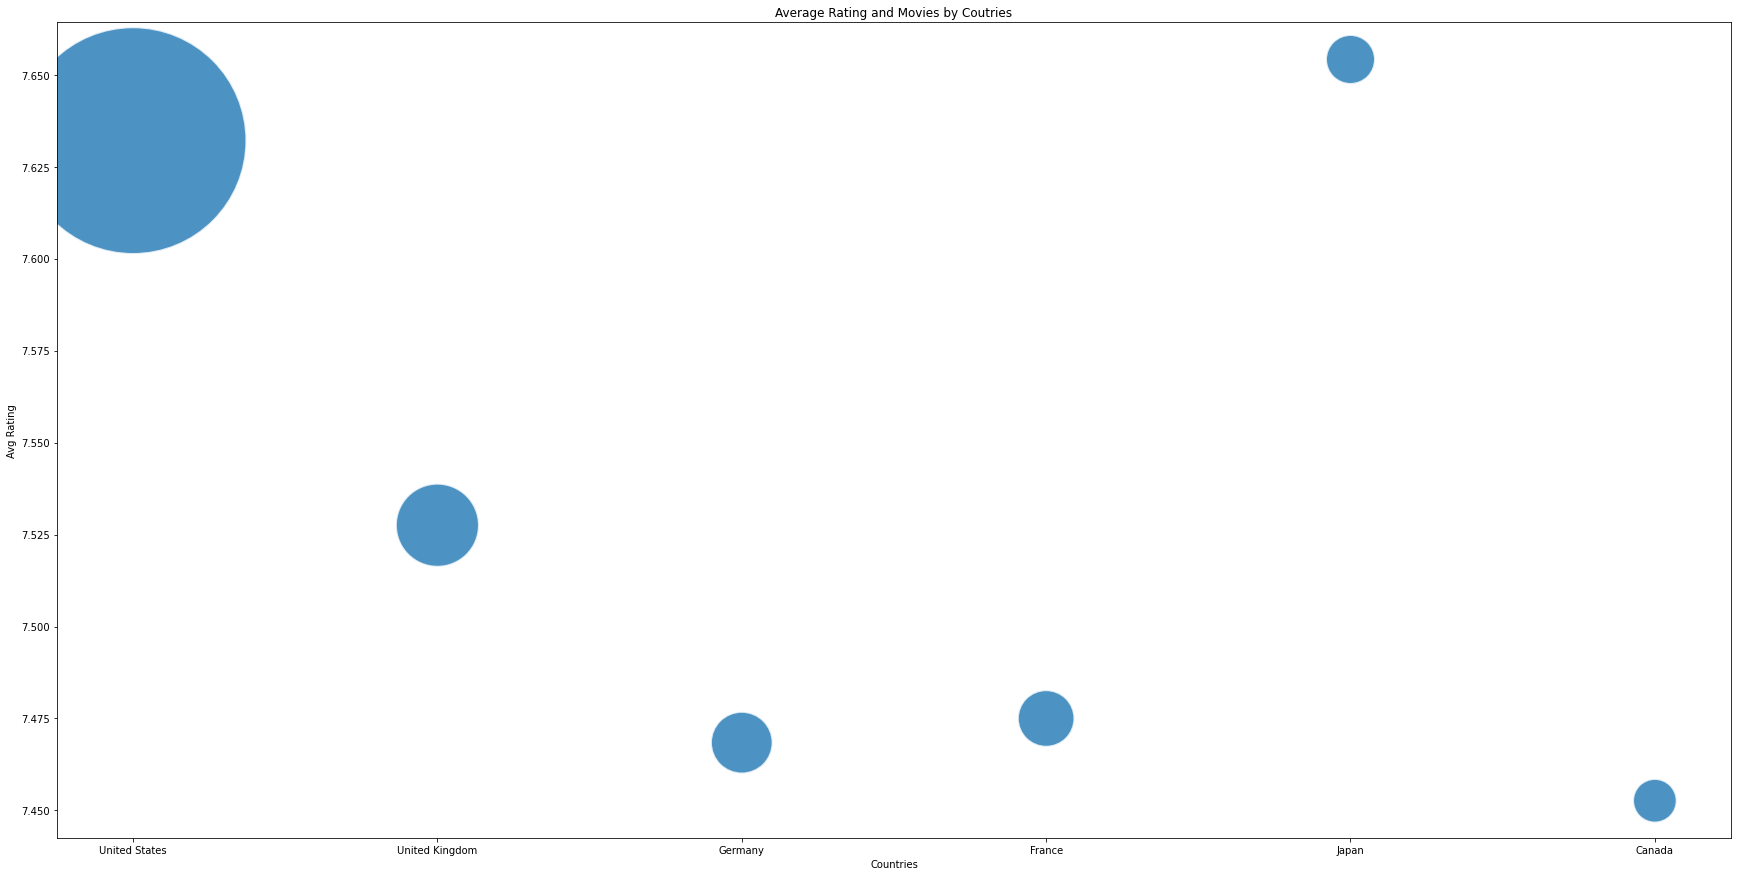

In [11]:
# Set the figure size
plt.figure(figsize=(30, 15))

# Scatterplot
plt.scatter(
    x = Ctry['Country'], 
    y = Ctry['avg_rating'], 
    s=Ctry['cnt']*100, 
#     c=data1952['continent'].cat.codes, 
    cmap="Accent", 
    alpha=0.8, 
    edgecolors="white", 
    linewidth=2);
# Add titles (main and on axis)

plt.xlabel("Countries")
plt.ylabel("Avg Rating")
plt.title("Average Rating and Movies by Coutries")

In [12]:
receny_rating = pysqldf("""select Recency,count(*) cnt_movies,avg(Rating) avg_rating from data group by 1 order by 1;""")
receny_rating.head(3)

,Recency,cnt_movies,avg_rating
0,6,2,7.300000
1,7,1,7.100000
2,8,3,7.366667


Text(0.5, 1.0, 'Average Rating and Movies by Recency')

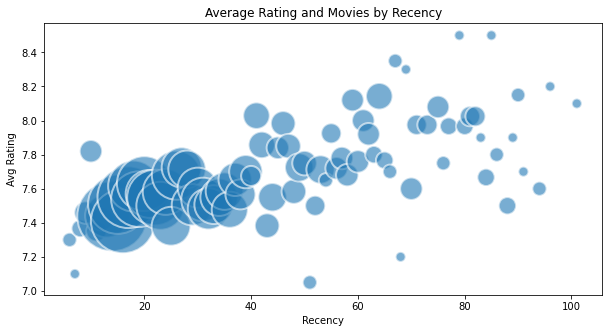

In [13]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Scatterplot
plt.scatter(
    x = recency_rating['Recency'], 
    y = recency_rating['avg_rating'], 
    s=receny_rating['cnt_movies']*100, 
#     c=data1952['continent'].cat.codes, 
    cmap="Accent", 
    alpha=0.6, 
    edgecolors="white", 
    linewidth=2);
# Add titles (main and on axis)

plt.xlabel("Recency")
plt.ylabel("Avg Rating")
plt.title("Average Rating and Movies by Recency")

In [14]:
data = data.rename(columns={'Release Year': 'Year'})

In [15]:
data.head()

,IMDB_id,Title,Budget,Genres,Revenue,Runtime,Language,Status,Vote Average,Country,Certificate,Rating,Year,Vote Count,Recency
0,tt0114709,Toy Story,0.030,"Animation,Comedy,Family",0.394437,81,English,Released,7.7,United States,G,8.3,1995,5415,26
1,tt0113497,Jumanji,0.065,"Adventure,Fantasy,Family",0.262822,104,English,Released,6.9,United States,PG,7.0,1995,2413,26
2,tt0113277,Heat,0.060,"Action,Crime,Drama,Thriller",0.187437,170,English,Released,7.7,United States,R,8.2,1995,1886,26
3,tt0113189,GoldenEye,0.060,"Adventure,Action,Thriller",0.352194,130,English,Released,6.6,United States,PG-13,7.2,1995,1194,26
4,tt0112641,Casino,0.052,"Drama,Crime",0.116112,178,English,Released,7.8,France,R,8.2,1995,1343,26


In [16]:
# data.Genres[0].split(',')
lst=[]
for val in data.Genres[0:5]:
    v = val.split(',')
    print(val)
#     lst.append(val.split(','))

Animation,Comedy,Family
Adventure,Fantasy,Family
Action,Crime,Drama,Thriller
Adventure,Action,Thriller
Drama,Crime


C:\Users\rupal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of Movies')

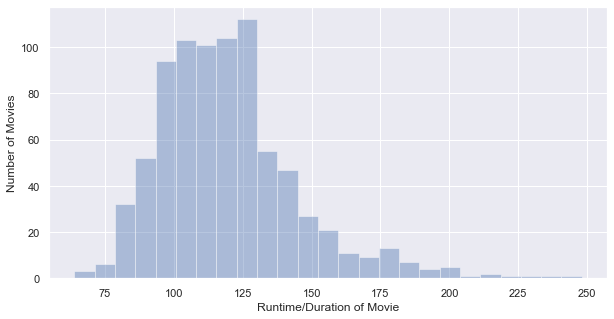

In [17]:
# library & dataset
import seaborn as sns
# Plot the histogram thanks to the distplot function
sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))
sns.distplot(bins=25,a=data['Runtime'], hist=True, kde=False, rug=False )
plt.xlabel('Runtime/Duration of Movie')
plt.ylabel('Number of Movies')

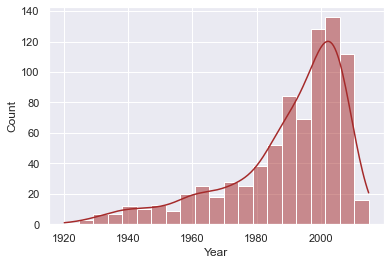

In [18]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
sns.histplot(data=data, x="Year", kde=True, color="Brown")
plt.show()

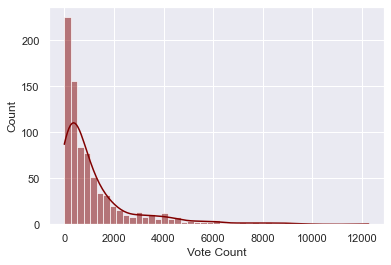

In [19]:
sns.set(style="darkgrid")
sns.histplot(data=data, x="Vote Count", kde=True, color="Maroon")
plt.show()

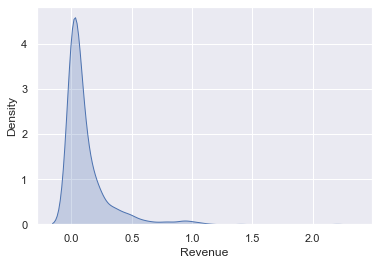

In [20]:
sns.set(style="darkgrid")
# density plot with shaded area with kdeplot 'shade' parameter

fig = sns.kdeplot(data['Revenue'], shade=True, color="b")
plt.show()

[[0.00012973]]


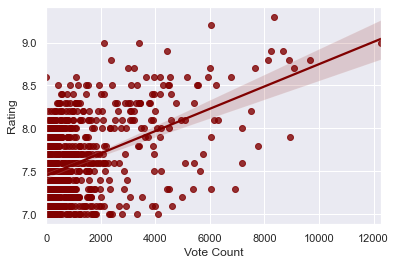

In [21]:
from sklearn.linear_model import LinearRegression
sns.regplot(x='Vote Count', y='Rating', data=data, color = 'Maroon')
vote_model = LinearRegression().fit(data[['Vote Count']], data[['Rating']])
print(vote_model.coef_)

[[0.23959528]]


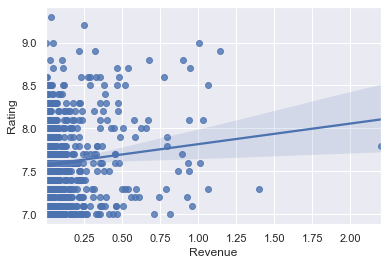

In [22]:
sns.regplot(x='Revenue', y='Rating', data=data)
vote_model = LinearRegression().fit(data[['Revenue']], data[['Rating']])
print(vote_model.coef_)

[[0.00681897]]


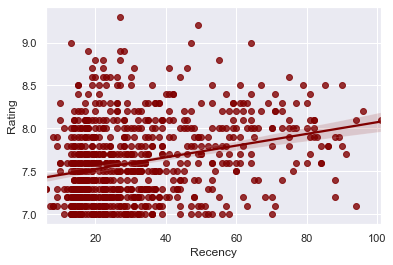

In [23]:
sns.regplot(x='Recency', y='Rating', data=data, color='Maroon')
vote_model = LinearRegression().fit(data[['Recency']], data[['Rating']])
print(vote_model.coef_)

[[0.00453876]]


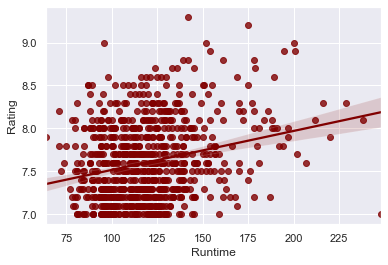

In [24]:
sns.regplot(x='Runtime', y='Rating', data=data, color = 'Maroon')
vote_model = LinearRegression().fit(data[['Runtime']], data[['Rating']])
print(vote_model.coef_)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import numpy as np

In [26]:
Xs = data[['Budget','Revenue','Runtime','Vote Average','Vote Count','Recency']]
y = data['Rating']
reg = LinearRegression()
reg.fit(Xs, y)
# print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))
print(reg.intercept_)
print(reg.coef_)

3.937714703489542
[-2.31831904e+00 -3.39493284e-01  3.01667529e-03  4.35353043e-01
  1.36785424e-04  3.47641211e-03]


In [27]:
X = np.column_stack((data['Budget'], data['Revenue'], data['Runtime'], data['Vote Average'], data['Vote Count'], data['Recency']))
y = data['Rating']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     325.2
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          2.24e-211
Time:                        16:25:16   Log-Likelihood:                -9.4762
No. Observations:                 813   AIC:                             32.95
Df Residuals:                     806   BIC:                             65.86
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9377      0.134     29.434      0.0

<Figure size 1152x720 with 0 Axes>

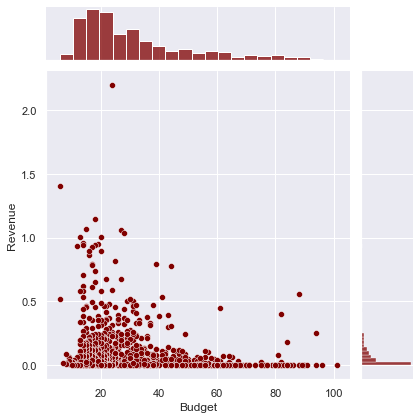

In [28]:
import seaborn as sns
plt.figure(figsize=[16,10])
h = sns.jointplot(x='Recency',y='Revenue',data=data, color = 'Maroon')
h.set_axis_labels('Budget','Revenue')
plt.show()

<Figure size 1440x720 with 0 Axes>

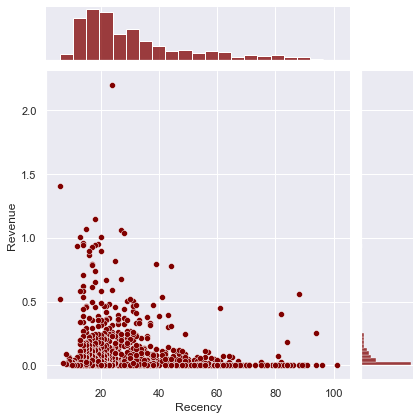

In [29]:
import seaborn as sns
plt.figure(figsize=[20,10])
h = sns.jointplot(x='Recency',y='Revenue',data=data, color = 'Maroon')
h.set_axis_labels('Recency','Revenue')
plt.show()

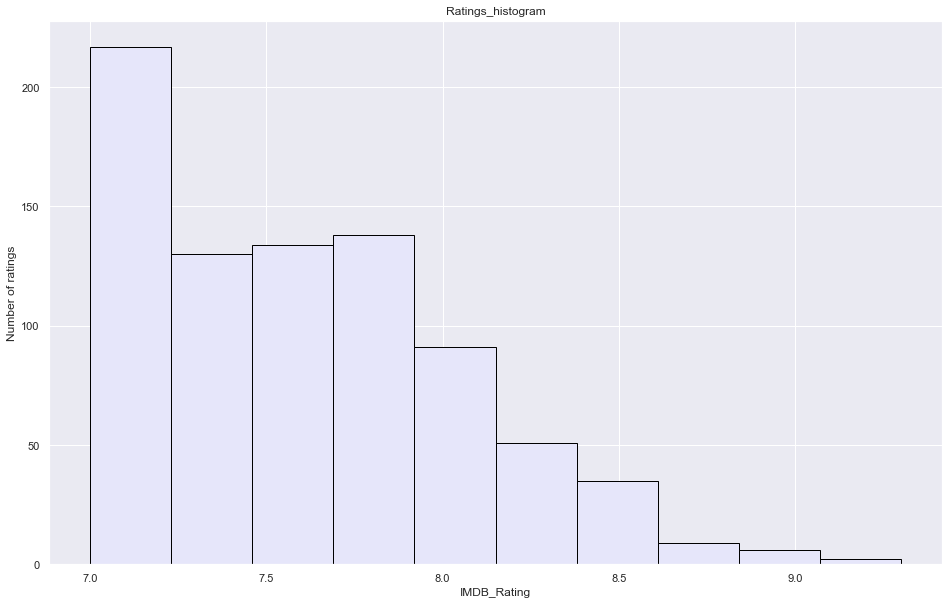

In [30]:
import math

data.Rating.hist(color ="Lavender",edgecolor="Black",figsize=(16,10))
plt.title('Ratings_histogram')
plt.xlabel('IMDB_Rating')
plt.ylabel('Number of ratings')
plt.savefig('Ratings_histogram')
plt.show()

# Continuous and Categorical variables relationship

[[0.00012973]]


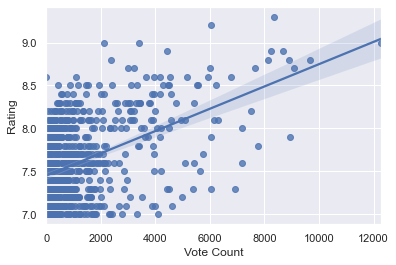

In [31]:
import seaborn as sns
sns.regplot(x='Vote Count', y='Rating', data=data)
vote_model = LinearRegression().fit(data[['Vote Count']], data[['Rating']])
print(vote_model.coef_)

[[0.23959528]]


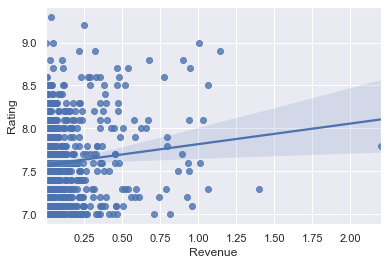

In [32]:
sns.regplot(x='Revenue', y='Rating', data=data)
vote_model = LinearRegression().fit(data[['Revenue']], data[['Rating']])
print(vote_model.coef_)

[[0.00453876]]


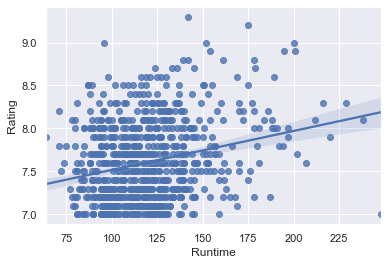

In [33]:
sns.regplot(x='Runtime', y='Rating', data=data)
vote_model = LinearRegression().fit(data[['Runtime']], data[['Rating']])
print(vote_model.coef_)

[[0.00681897]]


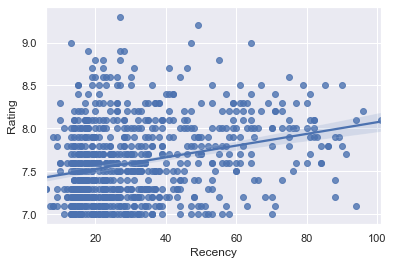

In [34]:
sns.regplot(x='Recency', y='Rating', data=data)
vote_model = LinearRegression().fit(data[['Recency']], data[['Rating']])
print(vote_model.coef_)

[[-0.77957732]]


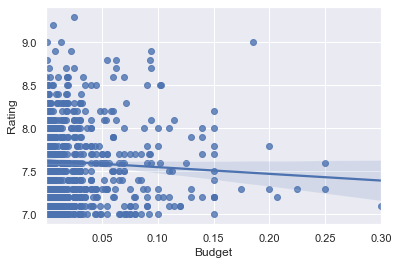

In [35]:
sns.regplot(x='Budget', y='Rating', data=data)
vote_model = LinearRegression().fit(data[['Budget']], data[['Rating']])
print(vote_model.coef_)

[[3.9919151]]


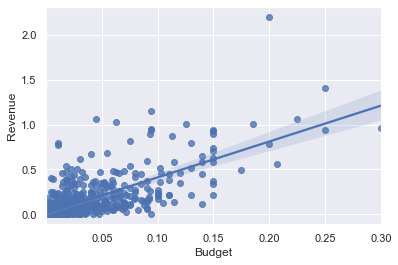

In [36]:
sns.regplot(x='Budget', y='Revenue', data=data)
vote_model = LinearRegression().fit(data[['Budget']], data[['Revenue']])
print(vote_model.coef_)

[[-0.00240613]]


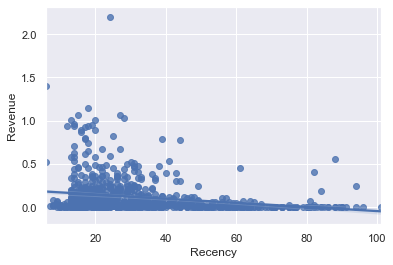

In [37]:
sns.regplot(x='Recency', y='Revenue', data=data)
vote_model = LinearRegression().fit(data[['Recency']], data[['Revenue']])
print(vote_model.coef_)

### Box plot for genre vs rating

In [38]:
count = 0
Animation=[]
Comedy=[]
Family=[]
Adventure=[]
Fantasy=[]
Action=[]
Crime=[]
Drama=[]
Thriller=[]
Romance=[]
Science_Fiction=[]
Mystery=[]
Music=[]
Horror=[]
History=[]
War=[]
Western=[]
Documentary=[]
TV_Movie=[]
Foreign=[]
label=[]
for i in data['Genres']:
    for j in str(i).split(','):
        label.append(j)
        label=list(set(label))
        if j == 'Animation':
            Animation.append(data.loc[count, 'Rating'])
        elif j == 'Comedy':
            Comedy.append(data.loc[count, 'Rating'])
        elif j == 'Family':
            Family.append(data.loc[count, 'Rating'])
        elif j == 'Adventure':
            Adventure.append(data.loc[count, 'Rating'])
        elif j == 'Fantasy':
            Fantasy.append(data.loc[count, 'Rating'])
        elif j == 'Action':
            Action.append(data.loc[count, 'Rating'])
        elif j == 'Crime':
            Crime.append(data.loc[count, 'Rating'])
        elif j == 'Drama':
            Drama.append(data.loc[count, 'Rating'])
        elif j == 'Thriller':
            Thriller.append(data.loc[count, 'Rating'])
        elif j == 'Romance':
            Romance.append(data.loc[count, 'Rating'])
        elif j == 'Science Fiction':
            Science_Fiction.append(data.loc[count, 'Rating'])
        elif j == 'Mystery':
            Mystery.append(data.loc[count, 'Rating'])
        elif j == 'Music':
            Music.append(data.loc[count, 'Rating'])
        elif j == 'Horror':
            Horror.append(data.loc[count, 'Rating'])
        elif j == 'History':
            History.append(data.loc[count, 'Rating'])
        elif j == 'War':
            War.append(data.loc[count, 'Rating'])
        elif j == 'Western':
            Western.append(data.loc[count, 'Rating'])
        elif j == 'Documentary':
            Documentary.append(data.loc[count, 'Rating'])
        elif j == 'TV Movie':
            TV_Movie.append(data.loc[count, 'Rating'])
        elif j == 'Foreign':
            Foreign.append(data.loc[count, 'Rating'])
        else:
            pass
    count += 1    
box_data = [Animation,Comedy,Family,Adventure,Fantasy,Action,Crime,Drama,Thriller,Romance,Science_Fiction,Mystery,Music,Horror,History,War,Western,Documentary,TV_Movie,Foreign]
label.remove('nan')

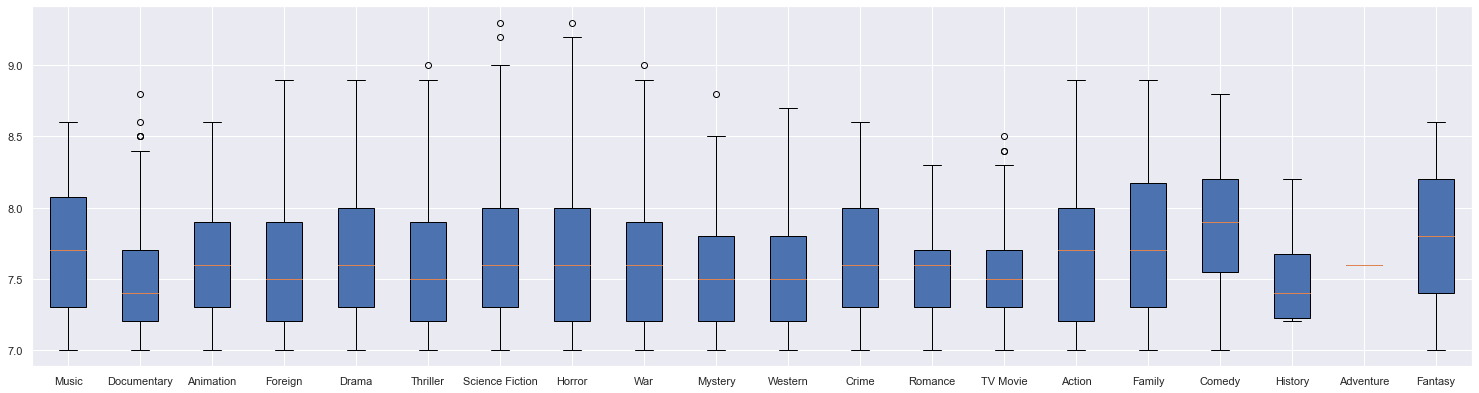

In [39]:
fig = plt.figure(figsize =(20, 5))
ax = fig.add_axes([0, 0, 1, 1])
c = 'red'
bp = ax.boxplot(box_data, labels=label, patch_artist=True)
plt.show()

In [40]:
data.head()

,IMDB_id,Title,Budget,Genres,Revenue,Runtime,Language,Status,Vote Average,Country,Certificate,Rating,Year,Vote Count,Recency
0,tt0114709,Toy Story,0.030,"Animation,Comedy,Family",0.394437,81,English,Released,7.7,United States,G,8.3,1995,5415,26
1,tt0113497,Jumanji,0.065,"Adventure,Fantasy,Family",0.262822,104,English,Released,6.9,United States,PG,7.0,1995,2413,26
2,tt0113277,Heat,0.060,"Action,Crime,Drama,Thriller",0.187437,170,English,Released,7.7,United States,R,8.2,1995,1886,26
3,tt0113189,GoldenEye,0.060,"Adventure,Action,Thriller",0.352194,130,English,Released,6.6,United States,PG-13,7.2,1995,1194,26
4,tt0112641,Casino,0.052,"Drama,Crime",0.116112,178,English,Released,7.8,France,R,8.2,1995,1343,26


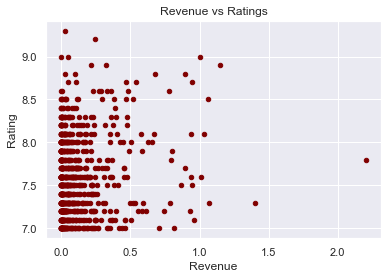

In [41]:
data.plot.scatter("Revenue","Rating",color = 'Maroon')
plt.title("Revenue vs Ratings")
plt.xlabel("Revenue")
plt.ylabel("Rating")
plt.show()